In [1]:
import pandas as pd
import glob

In [2]:
#get data file name:
path = '/Users/ellie/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_month_sales = pd.concat(li, axis=0, ignore_index=True)

all_month_sales.to_csv('all_month_sales.csv', index=False)

In [3]:
all_data = pd.read_csv('all_month_sales.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean the data

In [4]:
all_data.isnull().sum()
#Check the total number of null values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

##### drop NaN

In [5]:
df_nan = all_data[all_data.isna().any(axis=1)]
df_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data = all_data.dropna(how='all')

In [7]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_data.head()
#finding data in Order Date having "Or" 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [10]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int') 
#convert the type of values in Quantity Ordered into int

In [11]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
#convert the type of values in Price Each into float

#### Add a month column

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [13]:
all_data['Month'] = all_data['Month'].astype('int')

#### Add a Sales column

In [14]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Add a City column

In [16]:
a = '136 Church St, New York City, NY 10001'
a1= a.split(',')
print(a1)

['136 Church St', ' New York City', ' NY 10001']


In [17]:
b = 'New York City NY 10001'
b1 = b.split(' ')
print(b1)

['New', 'York', 'City', 'NY', '10001']


In [18]:
def get_city(x):
    return x.split(',')[1]
def get_state(x):
    return x.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


#### Add a Time column

In [19]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
dtype: object

In [20]:
all_data['Order Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Order Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

#### Question 1: What was the best month for sales? How much was earned that month?

In [21]:
df2 = all_data.groupby(all_data['Month']).sum()
df2

,Quantity Ordered,Price Each,Sales,Order Hour,Order Minute
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440
2,13449,2.188885e+06,2.202022e+06,172669,354885
3,17005,2.791208e+06,2.807100e+06,218969,447559
4,20558,3.367671e+06,3.390670e+06,262259,544186
5,18667,3.135125e+06,3.152607e+06,238780,487899
6,15253,2.562026e+06,2.577802e+06,195528,402436
7,16072,2.632540e+06,2.647776e+06,206169,417349
8,13448,2.230345e+06,2.244468e+06,172289,353857
9,13109,2.084992e+06,2.097560e+06,168513,341698


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


<Figure size 720x432 with 0 Axes>

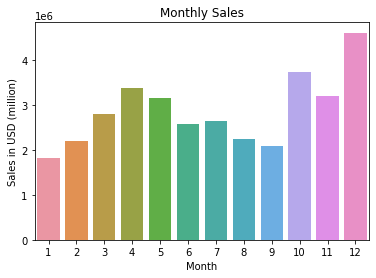

<Figure size 720x432 with 0 Axes>

In [23]:
sns.barplot(x=df2.index, y=df2['Sales'])
plt.title("Monthly Sales")
plt.ylabel("Sales in USD (million)")
plt.figure(figsize=(10,6))

#### Question 2: Which city had the highest sales?

In [66]:
df3 = all_data.groupby(all_data['City']).sum()
df3

,Quantity Ordered,Price Each,Month,Sales,Order Hour,Order Minute
City,,,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin TX,11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston MA,22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas TX,16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City NY,27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland ME,2750,4.471893e+05,17144,4.497583e+05,35211,72856
Portland OR,11303,1.860558e+06,70621,1.870732e+06,144421,295533
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06,643265,1319477


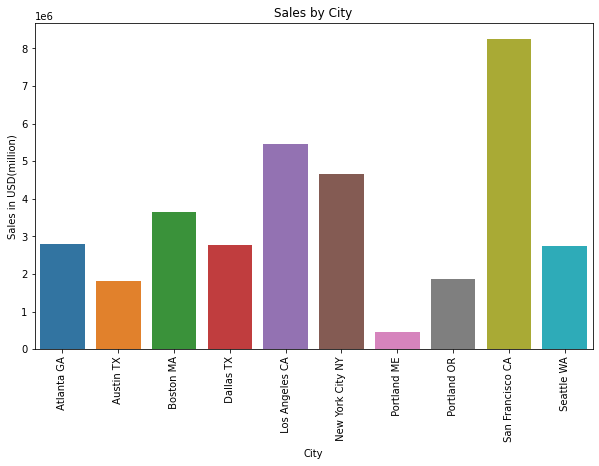

In [25]:
plt.figure(figsize=(10,6))
city_sales = sns.barplot(x=df3.index, y=df3['Sales'])
plt.title('Sales by City')
plt.ylabel('Sales in USD(million)')
for item in city_sales.get_xticklabels():
    item.set_rotation(90)

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


<AxesSubplot:xlabel='Order Hour', ylabel='Density'>

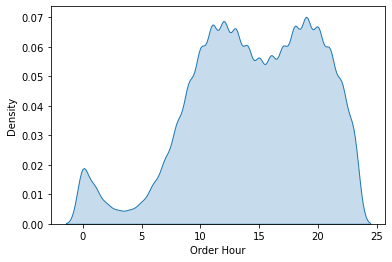

In [27]:
sns.kdeplot(data=all_data[('Order Hour')], shade=True)

In [28]:
#my recommendation is before 11am or at 19pm

#### Question 4: What products are most often sold together?

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [30]:
all_data.groupby(['Order ID', 'Product']).size().idxmax()

('142071', 'AA Batteries (4-pack)')

In [31]:
from itertools import combinations
from collections import Counter

In [32]:
Counter([
    t for _, d in all_data.groupby('Order ID').Product
    for t in combinations(d, 2)
]).most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 1005)]

In [33]:
df_new = all_data[all_data['Order ID'].duplicated(keep=False)]
df_new['Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_new.head(10)

<ipython-input-33-68bae98b1935>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Order Minute,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,Boston MA,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,New York City NY,14,32,"Vareebadd Phone,USB-C Charging Cable"
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,23.90,New York City NY,14,32,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin TX,12,27,"AA Batteries (4-pack),Bose SoundSport Headphones"
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin TX,12,27,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston MA,14,49,"iPhone,Lightning Charging Cable"
67,295726,Lightning Charging Cable,1,14.95,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston MA,14,49,"iPhone,Lightning Charging Cable"


In [34]:
df_new = df_new[['Order ID','Grouped']].drop_duplicates()
df_new.head(10)

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [46]:
list1 = df_new['Grouped'].to_list()

In [58]:
count = Counter()
for row in df_new['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

In [61]:
for key, value in count.most_common(5):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


#### Question 5: What products sell the most? Why do you think they are sold most?

In [89]:
df5 = all_data.groupby('Product').sum()
df5

,Quantity Ordered,Price Each,Month,Sales,Order Hour,Order Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


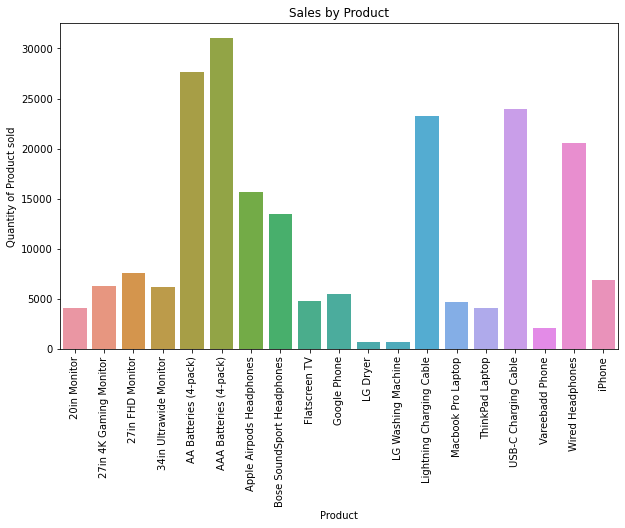

In [90]:
plt.figure(figsize=(10,6))
product_sales = sns.barplot(x=df5.index, y=df5['Quantity Ordered'])
plt.title('Sales by Product')
plt.ylabel('Quantity of Product sold')
for item in product_sales.get_xticklabels():
    item.set_rotation(90)

In [79]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


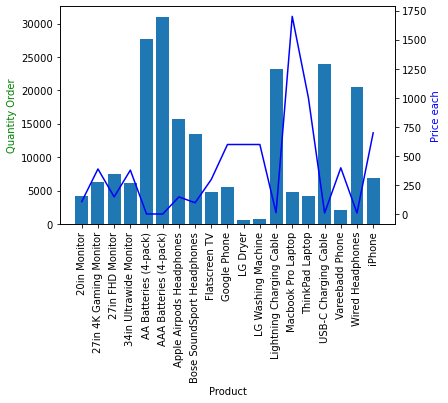

In [96]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df5.index, df5['Quantity Ordered'])
ax2.plot(df5.index, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Order', color='g')
ax2.set_ylabel('Price each', color='b')

for item in ax1.get_xticklabels():
    item.set_rotation(90)
plt.show()